# Descriptive Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
VERSION = '20220327'

evidence_df = pd.read_csv(f'../../data/processed/evidence_{VERSION}.csv')
order_df = pd.read_csv(f'../../data/processed/order_{VERSION}.csv')
order_entry_df = pd.read_csv(f'../../data/processed/order_entry_{VERSION}.csv')
user_df = pd.read_csv(f'../../data/processed/user_{VERSION}.csv')

In [3]:
user_df

,user_uid,group,is_mobile,n_category_search,t_first_reco_view,t_0,t_T,product_views,css
0,6222885b81ece9c26d146eff,treatment,1,NaN,2022-03-04T21:45:05.603683,2022-03-04T21:44:59.682979,2022-03-04T21:45:17.326452,1.0,1.0
1,6222886181ece9c26d147a81,control,1,7.0,2022-03-04T21:45:25.651769,2022-03-04T21:45:19.727756,2022-03-09T21:52:08.377106,7.0,6.0
2,6222889381ece9c26d14d605,control,0,NaN,2022-03-04T21:52:36.124108,2022-03-04T21:47:55.546127,2022-03-04T21:53:47.198043,6.0,6.0
3,62228a9481ece9c26d188866,treatment,1,NaN,2022-03-04T21:54:51.169093,2022-03-04T21:54:28.623894,2022-03-05T08:07:14.239020,6.0,5.0
4,62228af781ece9c26d196216,control,0,NaN,NaN,2022-03-04T21:56:57.347037,2022-03-04T21:57:07.823967,2.0,2.0
...,...,...,...,...,...,...,...,...,...
3834,624061155c796c58d255fd46,treatment,1,5.0,2022-03-27T13:08:47.633155,2022-03-27T13:05:26.369917,2022-03-27T14:02:51.457710,3.0,2.0
3835,624065685c796c58d25e4997,control,1,24.0,2022-03-27T13:27:21.361738,2022-03-27T13:25:56.911896,2022-03-27T13:36:52.209375,8.0,8.0
3836,624066cd5c796c58d2610d28,treatment,1,2.0,NaN,2022-03-27T13:31:45.265256,2022-03-27T13:33:45.834007,1.0,1.0
3837,62406ea45c796c58d270c4d0,control,0,15.0,2022-03-27T14:07:23.685258,2022-03-27T14:03:59.569052,2022-03-27T14:15:05.201592,5.0,5.0


# Randomization Checks

In [4]:
user_df.groupby(['is_mobile', 'group'])['user_uid'].count()

is_mobile  group    
0          control       670
           treatment     627
1          control      1289
           treatment    1253
Name: user_uid, dtype: int64

# Clicks

**Do consumers interact with the recommender carousel?**

In [5]:
click_df = evidence_df[evidence_df['name']=='click']

In [6]:
click_df.groupby(['is_mobile', 'group'])['duration'].agg(count= 'count', duration='mean')

count    duration
is_mobile group                       
0         control       83   31.281365
          treatment    187  354.603921
1         control      234   16.638674
          treatment    434   23.406646

> Consumers click on product carousel items more often when they come from a recommender system (i.e. higher click through rate). The time from product page view until click takes longer in the treatment group.

However, there is an extreme outlier. This might be the case of a user that stays long time inactive on the page and clicks after inactivity.

count      938.000000
mean        88.442666
std       2021.276256
min          1.407200
25%          8.155200
50%         12.763300
75%         20.204175
max      61882.230000
Name: duration, dtype: float64

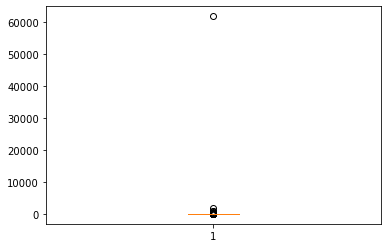

In [7]:
_ = plt.boxplot(click_df.duration)
click_df['duration'].describe()

n_clicks  avg_duration
is_mobile group                            
0         control          82     18.933621
          treatment       184     17.250854
1         control         234     16.638674
          treatment       432     17.857893

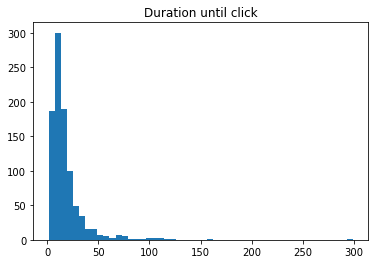

In [8]:
click_df = click_df[click_df['duration']<300]
_ = plt.hist(click_df.duration, bins=50)
_ = plt.title('Duration until click')
click_df.groupby(['is_mobile', 'group'])['duration'].agg(n_clicks='count', avg_duration='mean')

-> I removed this user from click dataset, therefore should be removed generally. Better: **winsorize**

# Order
**How does the recommender system influence conversion rate?**

In [9]:
order_df.groupby(['is_mobile', 'group'])['name'].count()

is_mobile  group    
0          control      50
           treatment    33
1          control      32
           treatment    43
Name: name, dtype: int64

> Higher conversion rate in control group on desktop - mobile vice versa.

**How does the recommender system influence the purchase amount?**

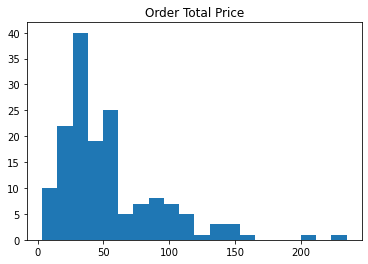

In [10]:
_ = plt.hist(order_df['order_total_price'], bins=20)
_ = plt.title('Order Total Price')

In [11]:
order_df.groupby(['is_mobile', 'group'])['order_total_price'].mean()

is_mobile  group    
0          control      53.141800
           treatment    54.351212
1          control      51.262500
           treatment    54.805581
Name: order_total_price, dtype: float64

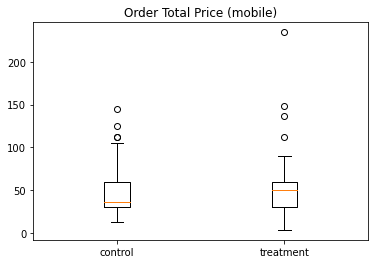

In [12]:
_ = plt.boxplot([
    order_df[(order_df['is_mobile']==1) & (order_df['group']=='control')]['order_total_price'],
    order_df[(order_df['is_mobile']==1) & (order_df['group']=='treatment')]['order_total_price']
    ])
_ = plt.xticks([1, 2], ['control', 'treatment'])
_ = plt.title('Order Total Price (mobile)')

# Order Entries

**How many same products do customers have in their cart on average?**

In [13]:
order_entry_df.groupby(['is_mobile', 'group'])['quantity'].mean()

is_mobile  group    
0          control      1.398148
           treatment    1.207792
1          control      1.104478
           treatment    1.651685
Name: quantity, dtype: float64

**How many different products are included in a cart?**

In [14]:
order_df.groupby(['is_mobile', 'group'])['entry_qty'].mean()

is_mobile  group    
0          control      2.260000
           treatment    2.333333
1          control      2.187500
           treatment    2.186047
Name: entry_qty, dtype: float64

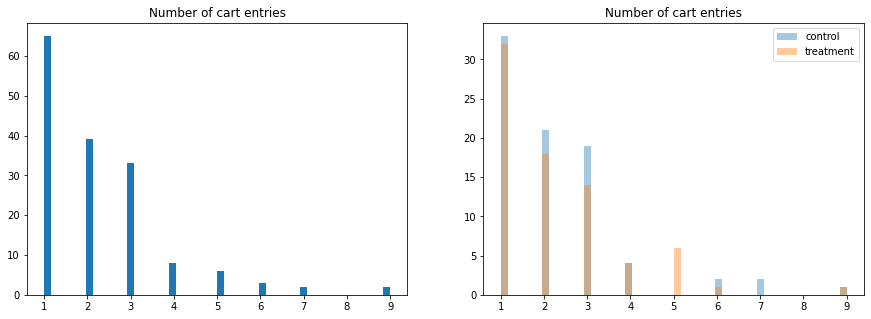

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
_ = axs[0].hist(order_df.entry_qty, bins=50)
_ = axs[1].hist(order_df[order_df['group']=='control'].entry_qty, bins=50, alpha=.4)
_ = axs[1].hist(order_df[order_df['group']=='treatment'].entry_qty, bins=50, alpha=.4)
_ = axs[0].set_title('Number of cart entries')
_ = axs[1].set_title('Number of cart entries')
_ = axs[1].legend(['control', 'treatment'])

# Search Behavior

**How many times do users use the "category search"**?

In [16]:
user_df.groupby(['is_mobile', 'group'])['n_category_search'].sum()

is_mobile  group    
0          control       5666.0
           treatment     4891.0
1          control      10266.0
           treatment     9111.0
Name: n_category_search, dtype: float64

*Hypothesis: On mobile devices recommender systems reduce the search costs & lead to higher revenues.*

Critique: RS is just a carousel that suggest categorical products. Why not simply showing a list of top category products?

# (Category) Search per Customer

In [17]:
user_df.groupby(['is_mobile', 'group'])['n_category_search'].mean()

is_mobile  group    
0          control      11.755187
           treatment    10.893096
1          control      11.868208
           treatment    11.110976
Name: n_category_search, dtype: float64

In [18]:
user_df[user_df.t_first_reco_view.notna()].groupby(['is_mobile', 'group'])['n_category_search'].mean()

is_mobile  group    
0          control      12.827586
           treatment    12.268222
1          control      13.242089
           treatment    12.423345
Name: n_category_search, dtype: float64

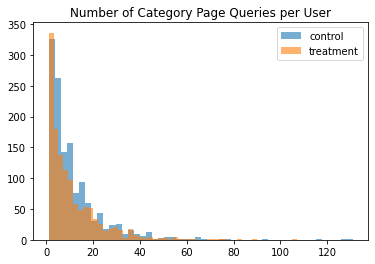

In [19]:
_ = plt.hist(user_df[user_df['group']=='control']['n_category_search'], bins=50, alpha=.6)
_ = plt.hist(user_df[user_df['group']=='treatment']['n_category_search'], bins=50, alpha=.6)
_ = plt.title('Number of Category Page Queries per User')
_ = plt.legend(['control', 'treatment'])

# Consideration Set

In [20]:
user_df[user_df.t_first_reco_view.notna()].groupby(['is_mobile', 'group'])['css'].agg(mean='mean')

mean
is_mobile group              
0         control    3.808140
          treatment  4.065957
1         control    3.756912
          treatment  3.734839

In [21]:
user_df

,user_uid,group,is_mobile,n_category_search,t_first_reco_view,t_0,t_T,product_views,css
0,6222885b81ece9c26d146eff,treatment,1,NaN,2022-03-04T21:45:05.603683,2022-03-04T21:44:59.682979,2022-03-04T21:45:17.326452,1.0,1.0
1,6222886181ece9c26d147a81,control,1,7.0,2022-03-04T21:45:25.651769,2022-03-04T21:45:19.727756,2022-03-09T21:52:08.377106,7.0,6.0
2,6222889381ece9c26d14d605,control,0,NaN,2022-03-04T21:52:36.124108,2022-03-04T21:47:55.546127,2022-03-04T21:53:47.198043,6.0,6.0
3,62228a9481ece9c26d188866,treatment,1,NaN,2022-03-04T21:54:51.169093,2022-03-04T21:54:28.623894,2022-03-05T08:07:14.239020,6.0,5.0
4,62228af781ece9c26d196216,control,0,NaN,NaN,2022-03-04T21:56:57.347037,2022-03-04T21:57:07.823967,2.0,2.0
...,...,...,...,...,...,...,...,...,...
3834,624061155c796c58d255fd46,treatment,1,5.0,2022-03-27T13:08:47.633155,2022-03-27T13:05:26.369917,2022-03-27T14:02:51.457710,3.0,2.0
3835,624065685c796c58d25e4997,control,1,24.0,2022-03-27T13:27:21.361738,2022-03-27T13:25:56.911896,2022-03-27T13:36:52.209375,8.0,8.0
3836,624066cd5c796c58d2610d28,treatment,1,2.0,NaN,2022-03-27T13:31:45.265256,2022-03-27T13:33:45.834007,1.0,1.0
3837,62406ea45c796c58d270c4d0,control,0,15.0,2022-03-27T14:07:23.685258,2022-03-27T14:03:59.569052,2022-03-27T14:15:05.201592,5.0,5.0
